In [28]:
library(haven)
library(stargazer)
library(dplyr)
library(infer)
library(ggplot2)



In [4]:
# reading data 

data <- read_dta("/Users/krishaantpathmanathan/Downloads/ECON 398/cen_ind_2021_pumf_v2.dta 3")

In [9]:
# simple regression 1 - CFInc (Income) based on Gentstat (First Gen / Second Gen Canadian)


reg_1 <-  lm(CFInc ~ genstat, data = data)

stargazer(reg_1, type = "text")



                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                       0.411***           
                               (0.006)           
                                                 
Constant                      20.798***          
                               (0.021)           
                                                 
-------------------------------------------------
Observations                   980,868           
R2                              0.004            
Adjusted R2                     0.004            
Residual Std. Error      8.944 (df = 980866)     
F Statistic         4,277.340*** (df = 1; 980866)
Note:                 *p<0.1; **p<0.05; ***p<0.01


In [14]:
# simple regression 2 - adding covariates for Gender and agegrp 

reg_2 <-  lm(CFInc ~ genstat + Gender + agegrp, data = data)

stargazer(reg_2, type = "text")



                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                       0.395***           
                               (0.006)           
                                                 
Gender                        0.481***           
                               (0.018)           
                                                 
agegrp                        -0.142***          
                               (0.001)           
                                                 
Constant                      21.790***          
                               (0.037)           
                                                 
-------------------------------------------------
Observations                   980,868           
R2                              0.018            
Adjusted R2                     0.018            

In [18]:
# simple regression 3 - adding covariates for hdgree (education level) and lfact (labour force participation)

reg_3 <-  lm(CFInc ~ genstat + Gender + agegrp + hdgree + lfact, data = data)

stargazer(reg_3, type = "text")



                         Dependent variable:      
                    ------------------------------
                                CFInc             
--------------------------------------------------
genstat                        0.430***           
                               (0.006)            
                                                  
Gender                         0.371***           
                               (0.017)            
                                                  
agegrp                        -0.094***           
                               (0.001)            
                                                  
hdgree                         0.274***           
                               (0.001)            
                                                  
lfact                         -0.271***           
                               (0.001)            
                                                  
Constant                      

In [20]:
# simple regression 4 - by pr (province)

reg_4 <-  lm(CFInc ~ genstat + Gender + agegrp + hdgree + lfact + pr, data = data)

stargazer(reg_4, type = "text")




                         Dependent variable:      
                    ------------------------------
                                CFInc             
--------------------------------------------------
genstat                        0.461***           
                               (0.006)            
                                                  
Gender                         0.371***           
                               (0.017)            
                                                  
agegrp                        -0.094***           
                               (0.001)            
                                                  
hdgree                         0.274***           
                               (0.001)            
                                                  
lfact                         -0.270***           
                               (0.001)            
                                                  
pr                            

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


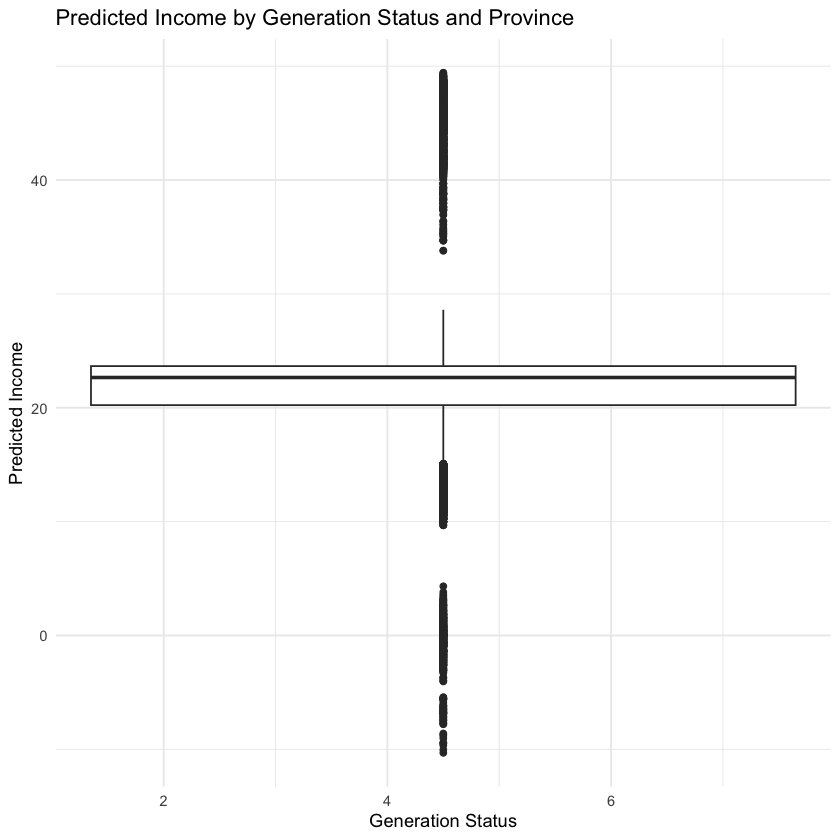

In [30]:
# some useful ? visualisations 

data$predicted <- predict(reg_4)
ggplot(data, aes(x = genstat, y = predicted, color = pr)) +
  geom_boxplot() +
  labs(title = "Predicted Income by Generation Status and Province",
       x = "Generation Status", y = "Predicted Income") +
  theme_minimal()


In [33]:
# checking for interaction effects 

reg_interaction <- lm(CFInc ~ genstat * hdgree + genstat * lfact + pr + Gender + agegrp, data = data)


stargazer(reg_interaction, type = "text")



                         Dependent variable:      
                    ------------------------------
                                CFInc             
--------------------------------------------------
genstat                        0.389***           
                               (0.007)            
                                                  
hdgree                         0.283***           
                               (0.002)            
                                                  
lfact                         -0.295***           
                               (0.002)            
                                                  
pr                             0.026***           
                               (0.001)            
                                                  
Gender                         0.368***           
                               (0.017)            
                                                  
agegrp                        